# Least Action with least squares minimization 

Load modules

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import scipy.optimize 
import pandas as pd
global g  
g=9.8

<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction3.svg?sanitize=true">
</div>


## Geometry interpretation
Following the geometry theory developed [here](http://www.eftaylor.com/software/ActionApplets/LeastAction.html), we will try to define something called the _Action_ for one small segment of the free fall movement in one-dimension. 

For that we need the experimental data consisting on the height of an object of mass $m$ in free fall, and the height $x_i$, for each time $t_i$. This data would be fitted by a polynomial of degree two, as displayed in the figure for one of the fitted segments of the plot of $x$ as a function of $t$. We take the origin of the coordinates at ground level. For each segment we can calculate an average kinetic energy, $T$, and an averge potential energy, $V$, in the limit of $\Delta t=t_2-t_1$ small. From the figure

\begin{align}
T_{12}=\frac12 m v^2\approx &\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2\,,&
V_{12}=mgh\approx& m g \frac{x_2+x_1}{2}\,.
\end{align}

We can then reformulate the problem of the free fall in the following terms. From all the possible curves that can interpolate the points $(t_1,x_1)$ and $(t_2,x_2)$, which is the correct one?. 

The answer obtained by Euler can be obtained from the definition of the function "Lagrangian"
$$L(t)=T(t)-V(t)$$

We define the "Action" of one interpolating function between the points $(t_1,x_1)$ and $(t_2,x_2)$ as
$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$

The result if that correct interpolation is the one that has a minumum value for the Action!

For one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sufficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S_1&=&\int_{t_1}^{t_2} L dt \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

## Code implementation

### The Action
We define the Action $S$ such of an object of mass $m$ throw vertically upward from $x_{\hbox{ini}}$, such that $t_{\hbox{end}}$ seconds later the object return to a height $x_{\hbox{end}}$, as
\begin{eqnarray}
S&=&\int_{t_{\hbox{ini}}}^{t_{\hbox{end}}} L\, {\rm d}t \\
&=&\sum_i L_i \Delta t
\end{eqnarray}

In [7]:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    t=float(tend)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

## Least Action calculation

_Problem_: Let an object of mass $m=0.2$ Kg throw vertically updward and returning back to the same hand after 3 s. Find the function of distance versus time of least Action. 

If we denote the height at time $t_i$ as $x_i=x(t_i)$, we can calculate the action for any set of $x_i$ points with the inititial and final points fixed at $0\ $m.

__Example__: By using the previous definition, calculates the Action for 21 steps in time from $0$ at $3\ $s for an object that does not move at all

__Solution__:

In [11]:
x=np.zeros(21)
S(x)

0.0

__Activity__:  _Brute force approach_

1) calculates the Action for 21 steps in time from $0$ at $3\ $s, for an object that at a random position in each time between zero and $15\ $m, but with the initial and final positions set to zero. Make the plot for the random curve. 

Let us divide the intervals in 21 parts:

In [136]:
#Initialize with the maximum possible value
Smin=np.inf
for i in range(100000):
    #21 one random number between 0 and 15
    x=np.random.uniform(0,15,21)
    # Force the boundary conditions
    x[0]=0
    x[-1]=0
    Sx=S(x)
    if Sx<Smin:
        #Get new minimum
        Smin=Sx
        xmin=x
        print(Smin)

<!-- xmin=pd.read_csv('https://github.com/restrepo/ComputationalMethods/raw/master/data/random.csv').xrandom.values -->

Check again the Acion, $S$, value for `xmin`

2) Find the set of interpolation Lagrange polinomial that a set a points as smooth as possible

In [328]:
from scipy import interpolate

Assign a time, $t_i$ to each $x_i$ point in `xmin`

In [329]:
tx=np.linspace(0,3,len(xmin))

Complete the set of interpolation Lagrange polynomials: Change `pe` to the high value that allows for on smooth curve, and uncomment the next code and repeat as many times as required

(-0.1, 3.3)

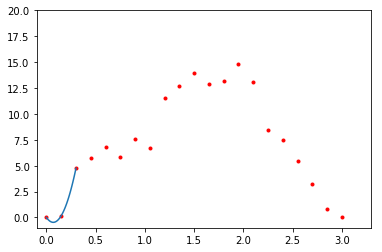

In [330]:
p=[]
plt.plot(tx,xmin,'r.')
pi=0
pe=3
L=interpolate.lagrange(tx[pi:pe],xmin[pi:pe])
txx=np.linspace(tx[pi],tx[pe-1])
plt.plot(txx,L(txx))
#Repeat to get a fit as smoot as possible
#pi=pe-1
#pe=8
#L=interpolate.lagrange(tx[pi:pe],xmin[pi:pe])
#txx=np.linspace(tx[pi],tx[pe-1])
#plt.plot(txx,L(txx))

plt.ylim(-1,20)
plt.xlim(-0.1,3.3)

3) Built a step function for the full range each of the interpolation Lagrangian polynomial in each range

4) Fit the points with a polynomial of degree 2

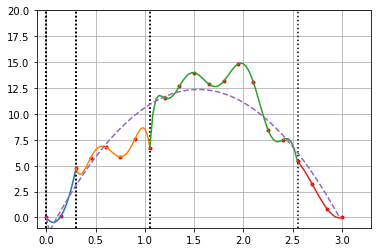

In [325]:
p=[1,3,8,18,21]
L=[]
ts=[]
plt.plot(tx,xmin,'r.')
for i in range(len(p)):
    if i<len(p)-1:
        L.append(interpolate.lagrange(tx[p[i]-1:p[i+1]],xmin[p[i]-1:p[i+1]]))
        txx=np.linspace(tx[p[i]-1],tx[p[i+1]-1])
        plt.plot(txx,L[-1](txx))
        ts.append(tx[p[i]-1])
        plt.vlines(ts,-1,20,linestyles=':')

def ff(t):
    if t<0:
        return 0
    if t>=3:
        return 0
    for i in range(len(ts)-1):
        if t >= ts[i] and t<ts[i+1]:
            return L[i](t)
f=np.vectorize(ff)
x=f(tt)
P=np.poly1d( np.polyfit(tx,xmin,deg=2) )
xP=P(tt)
xP[0]=0
xP[-1]=0
plt.plot(tt,xP,'--')
plt.ylim(-1,20)
plt.xlim(-0.1,3.3)
plt.grid()

4) Compare the Action for `xmin`, some `x` obtained from the full range function obtained from the interpolation Lagrange polynomials, and some `xP` obtained from the degree 2 polynomial

In [ ]:
S(xmin)

In [ ]:
S(x)

In [ ]:
S(xP)

### Minimization

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [331]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    import scipy.optimize as optimize
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

In [332]:
t=3.
m=0.2
y=xfit(21,t,m)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


### Plot

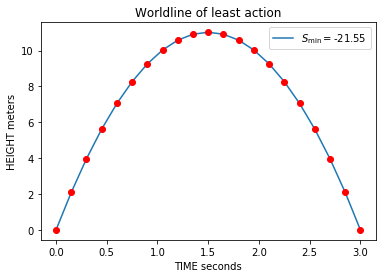

In [333]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')

Check the equation of movement: 
$$x(t)=\frac{{1}}{{2}}gt^2+v_0t$$

In [338]:
P=poly1d ( np.polyfit(tx,x,2) )
print(P)

      2
-4.9 x + 14.7 x + 0.0001604


### Dynamics of the least action solution

#### Velocity

Text(0,0.5,'VELOCITY meter/seconds')

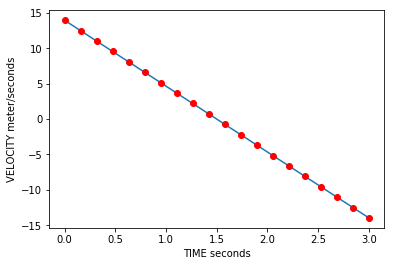

In [339]:
v=(x[1:]-x[:-1])/Dt
Dt=t/v[:-1].size
tx=np.arange(0,t+Dt,Dt)
plt.plot(tx,v)
plt.plot(tx,v,'ro')
plt.xlabel('TIME seconds')
plt.ylabel('VELOCITY meter/seconds')

#### Aceleration

Text(0.5,1,'ACELERATION meter/second$^2$')

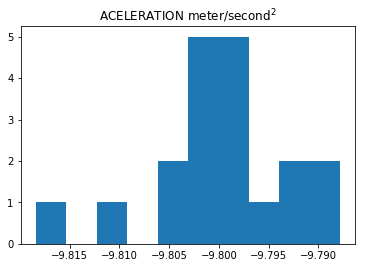

In [340]:
Dt=t/x[:-1].size
a=(v[1:]-v[:-1])/Dt
pa=plt.hist(a)
plt.title('ACELERATION meter/second$^2$')

#### Energy

In [342]:
T=0.5*m*v**2
V=0.5*m*g*(x[1:]+x[:-1])
E=T+V
print(np.round(E,2))

[21.56 21.56 21.56 21.56 21.56 21.56 21.55 21.55 21.56 21.56 21.56 21.56
 21.56 21.56 21.56 21.55 21.55 21.56 21.56 21.55]


#### Action

The Action is minimal in each interval!

In [343]:
SS=(T-V)*Dt
SS

array([ 2.6176807 ,  1.45086655,  0.41339493, -0.49445999, -1.27239049,
       -1.92031545, -2.4394347 , -2.82826668, -3.08743238, -3.21713111,
       -3.21711685, -3.08747346, -2.82816485, -2.43888968, -1.9203943 ,
       -1.27224487, -0.49433121,  0.41338257,  1.45064061,  2.61710336])

In [344]:
print( 'S_MINIMUM=%g  Joules*second' %SS.sum() )

S_MINIMUM=-21.555  Joules*second
